In [233]:
import sys
# adding to the path variables the one folder higher (locally, not changing system variables)
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import requests

from bs4 import BeautifulSoup
import time
from random import randint

import re
from datetime import datetime
import json
import sqlite3

warnings.filterwarnings('ignore')

## Scraping different categories inside each page of the real estate

In [223]:
# Single use, only for experiments

city = "berlin" # berlin
real_estate = "wohnung" # oder haus
payment = "kaufen" # mieten, kaufen

In [284]:
city_list = ["hamburg", "berlin"]
real_estate_list = ["wohnung", "haus"]
payment_list = ["mieten", "kaufen"]

def multiple_request(city_list, real_estate, payment_list):
# Scrapping all categories // not implementer yet 

    for city in city_list:
        for real_estate in real_estate_list:
            for payment in payment_list:
                print(city,real_estate, payment)
                #here the webscraping protocol should start
    return final_session_df

In [65]:
# finds all tags in the document. NOT USED in this document
for tag in content.find_all(True):
    print(tag.name)

html
head
meta
title
script
meta
meta
meta
meta
meta
meta
meta
meta
meta
style
meta
meta
link
link
link
link
link
link
link
link
link
link
link
script
script
script
script
script
script
body
div
div
div
div
div
script
script
div
script
style
navigation-ui-header
noscript
div
h3
p
style
div
ol
li
a
ul
li
a
span
li
a
li
a
li
span
div
div
form
input
input
input
input
input
input
input
input
select
option
option
option
option
option
option
main
noscript
div
p
p
div
div
div
form
input
input
input
div
input
div
div
label
div
span
input
div
span
span
input
input
span
div
input
input
input
input
input
input
input
div
ul
li
input
label
li
p
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label
li
input
label


# For-loop Experiment 

In [225]:
url=f"https://www.immonet.de/{city}/{real_estate}-{payment}-seite0.html"
url_read_out = requests.get(url)
content = BeautifulSoup(url_read_out.content, "html.parser")
doc = content.find_all("li", "pagination-item") # the target dictionary has the name "utag_data"
doc

[<li class="pagination-item"><span class="padding-left-15 paddint-left-sm-12 padding-right-15 padding-right-sm-12 v-line-shadow v-line-shadow-l">0</span></li>,
 <li class="pagination-item"> <a class="padding-left-15 paddint-left-sm-12 padding-right-15 padding-right-sm-12 v-line-shadow v-line-shadow-l cursor-hand" data-enum="1" onclick="immonet.showPage('//www.immonet.de', 'berlin/wohnung-kaufen-seite1.html');" title="Seite 1">1</a></li>,
 <li class="pagination-item"><span class="padding-left-6 padding-right-6 v-line-shadow v-line-shadow-l">... </span></li>,
 <li class="pagination-item"><a class="padding-left-15 paddint-left-sm-12 padding-right-15 padding-right-sm-12 v-line-shadow v-line-shadow-l cursor-hand" data-enum="204" onclick="immonet.showPage('//www.immonet.de', 'berlin/wohnung-kaufen-seite204.html');" title="Seite 204">204</a></li>]

In [226]:
# Immonet data
number_page = re.search("data-enum=\"[0-9][0-9]+\"", str(doc)).group(0)
max_page = int(re.search("\d+", number_page).group(0))
print("Number of Scraped Pages in the for-loop:", max_page)

Number of Scraped Pages in the for-loop: 204


In [227]:
def energie_heiz_typ_primar_energie(price_and_energy, search):
    x = re.search(f'({search})(.+?)(div)', str(price_and_energy))
    if x == None:
        return x
    else:
        return re.search(f'({search})(.+?)(div)', str(price_and_energy)).group(2)

In [228]:
def einzugstermin_func(price_and_energy):
    x = re.search(r"\d{2}.\d{2}.\d{4}", str(price_and_energy))
    if x == None:
        return x
    else:
        return datetime.strptime(re.search(r"\d{2}.\d{2}.\d{4}", str(price_and_energy)).group(0), "%d.%m.%Y")

In [229]:
def baujahr_energievebrauch(price_and_energy, search):
    x = re.search('({search})(.+?)(div)', str(price_and_energy))
    if x == None:
        return x
    else:
        return int(re.findall(r"\d+", re.search(f'({search})(.+?)(div)', str(price_and_energy)).group(2))[0])

In [230]:
def nebenkosten_kaution_genoss_(price_and_energy, search):
    x = re.search(f'({search})(.+?)(€)', str(price_and_energy))
    if x == None:
        return x
    else:
        return int(re.findall(r"\d+", re.search(f'({search})(.+?)(€)', str(price_and_energy)).group(2))[0])

In [237]:
def additional_df(content):
    # run after an overview page was scraped
    real_estate_ID_list = re.findall("selObject_[0-9]+", str(content))
    real_estate_ID_list = re.findall(r'\d+', ' '.join([i for i in real_estate_ID_list]))
    column_names = ['titel', 'nebenkosten', 'kaution_genoss','baujahr', 
                    'einzugstermin','energieverbrauch', 'energie', 'heiz_typ', 
                    'primar_energie', 'objektbeschreibung', 'lage', 'ausstatung', 'sonstiges']

    for i, real_estate_ID in enumerate(real_estate_ID_list): 
        time.sleep(randint(0, 1)) 

        # content single entry
        #--------------------------------------------------------------------------------------------------- 
        url=f"https://www.immonet.de/angebot/{real_estate_ID}?drop=sel&related=false&product=standard"
        url_read_out = requests.get(url)
        content_single_entry = BeautifulSoup(url_read_out.content, "html.parser")
        #print(url)

        # preparation for regex 
        #--------------------------------------------------------------------------------------------------- 
        price_and_energy = content_single_entry.find_all("div", "col-xs-12 col-sm-6 text-100")
        price_and_energy = "".join(line.strip() for line in str(price_and_energy).split("\n"))

        # 1st column title of the entry
        titel = content_single_entry.find("title")
        # 2nd column nebenkosten
        nebenkosten = nebenkosten_kaution_genoss_(price_and_energy, 'priceid_20">')
        # 3rd column kaution/genossenschaftsanteil
        kaution_genoss = nebenkosten_kaution_genoss_(price_and_energy, 'priceid_19">') 
        # 4th baujahr
        baujahr = baujahr_energievebrauch(price_and_energy, 'yearbuild">') 
        # 5th einzugstermin
        einzugstermin = einzugstermin_func(price_and_energy)
        # 6th energieverbrauch
        energieverbrauch = baujahr_energievebrauch(price_and_energy, 'energyValue">') 
        # 7th energie
        energie = energie_heiz_typ_primar_energie(price_and_energy, 'electricityConsumptionValue">') 
        # 8th heiz_typ
        heiz_typ = energie_heiz_typ_primar_energie(price_and_energy, 'heatTypeValue">') 
        # 9th primarenergie 
        primar_energie = energie_heiz_typ_primar_energie(price_and_energy, 'heaterSupplierValue">') 
        # 10th objektbeschreibung
        objektbeschreibung = content_single_entry.find_all("p", class_="text-100", id="objectDescription")
        # 11th lage
        lage = content_single_entry.find_all("p", class_="text-100", id="locationDescription") 
        # 12th ausstatung
        ausstatung = content_single_entry.find_all("span", class_="block padding-left-21") #exctract ausstatung
        ausstatung = "".join(line.strip() for line in str(ausstatung).split("\n")) # single string without white space
        ausstatung = re.findall('>(.+?)<', ausstatung) #make list of the elements
        # 13th sonstiges
        sonstiges = content_single_entry.find_all("p", class_="text-100", id="otherDescription") 

        # combine data 
        # ------------------------------------------------------------------------
        session_list = [titel, nebenkosten, kaution_genoss, baujahr, einzugstermin, energieverbrauch, energie, heiz_typ, primar_energie, objektbeschreibung, lage, ausstatung, sonstiges]
        df2 = pd.DataFrame([session_list], columns=column_names, index=[i])

        if i == 0:
            complete_additional_df = df2
        else:
            complete_additional_df = pd.concat([complete_additional_df, df2])

    return complete_additional_df

In [ ]:
#key cell for scrapping
loop_count = 0
for i in range(76, max_page): # changed value here
    loop_count +=1
    time.sleep(randint(0, 1)) # not needed if additional_df(content)is running because it has also a sleep function
    url=f"https://www.immonet.de/{city}/{real_estate}-{payment}-seite{i}.html"
    url_read_out = requests.get(url)
    content = BeautifulSoup(url_read_out.content, "html.parser")
    doc = content.body.find(string = re.compile("utag_data")) # the target dictionary has the name "utag_data"
    data = json.loads(re.search('({.+})', doc).group(0).replace("'", '"')) # extract the target dictionary
    df = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in data.items()])) # create a pandas dataframe. ignore arrays of different length
    print('completed', i, '/', max_page)
    if i == 0:
        complete_session_df = df 
    else:
        complete_session_df = pd.concat([complete_session_df, df])
    
    complete_additional_df = additional_df(content)

# some values are only shown in the first row, but are valid for all rows   
complete_session_df.app_time.fillna(complete_session_df.app_time.iloc[0], inplace=True)
complete_session_df.search_federalstate.fillna(complete_session_df.search_federalstate.iloc[0], inplace=True)
complete_session_df.search_state.fillna(complete_session_df.search_state.iloc[0], inplace=True)
complete_session_df.search_objekt_nutzungsart.fillna(complete_session_df.search_objekt_nutzungsart.iloc[0], inplace=True)
complete_session_df.app_server.fillna(complete_session_df.app_server.iloc[0], inplace=True)
complete_session_df.app_version.fillna(complete_session_df.app_version.iloc[0], inplace=True)

# change  unix timestamp to datetime 
complete_session_df.app_time = complete_session_df.app_time.apply(lambda x: pd.to_datetime(x, unit='ms'))
final_session_df = complete_session_df.merge(complete_additional_df, how='outer', left_index=True, right_index=True)

print("Finished! Number of pages:", loop_count)

In [22]:
# how to name the final dataframe
name_ = f"{city}_{real_estate}_{payment}_%s_%s_%s_%s" % (time.localtime()[0], time.localtime()[1], time.localtime()[2], time.localtime()[3])
final_session_df.to_csv(f"{name_}")

'hamburg_wohnung_mieten_2023_3_7_8'

# SQL
[sql python API link](https://docs.python.org/3/library/sqlite3.html)
and
[overview over databases](https://alg.manifoldapp.org/read/introduction-to-database-systems/section/d4fb8b9b-8db2-4343-adc4-20ef987a2762)

In [24]:
con = sqlite3.connect("example.db")
cur = con.cursor()

In [25]:
# pandas to SQL. Creates new table in database. first entry is the name of the new table in the database.
# the new table is named after: city name, real_estate, payment and date
complete_session_df.to_sql(f"{city}_{real_estate}_{payment}_%s_%s_%s_%s" % (time.localtime()[0], 
                                                                            time.localtime()[1], 
                                                                            time.localtime()[2], 
                                                                            time.localtime()[3]), con)

861

In [ ]:
# if you want to insert into existing table

In [8]:
# first pip install ipython-sql 
%load_ext sql

In [9]:
%sql sqlite:///example.db

In [10]:
# Checks the content of the sql database
%sql SELECT * FROM sqlite_master WHERE type = "table"

 * sqlite:///example.db
Done.


type,name,tbl_name,rootpage,sql
table,example,example,2,"CREATE TABLE example (['enh_impression_id', 'enh_impression_list', 'enh_impression_name', 'enh_impression_position', 'search_locationnames', 'search_districts', 'search_objekt_nutzungsart', 'search_features', 'search_state', 'search_federalstate', 'search_marketingtype', 'search_city', 'search_objektart', 'search_objektart_sub', 'search_objekt_zustand', 'search_sortby', 'sel_pagenumber', 'sel_objectoffset', 'sel_type', 'sel_list_size', 'page_type', 'broker_id', 'object_area', 'object_city', 'object_currency', 'object_display_state', 'object_district', 'object_features', 'object_federalstate', 'object_gok', 'object_is_special', 'object_label', 'object_marketingtype', 'object_objekt_nutzungsart', 'object_objekt_zustand', 'object_objektart', 'object_objektart_sub', 'object_price', 'object_rooms', 'object_listingtype', 'app_server', 'app_version', 'app_time', 'customer_cookie_accepted'])"
table,scraped_data,scraped_data,3,"CREATE TABLE scraped_data (red, blue, gree)"
table,scraped_data2,scraped_data2,4,"CREATE TABLE scraped_data2 (red, blue, gree)"
table,scraped_data3,scraped_data3,5,"CREATE TABLE scraped_data3 (enh_impression_id, enh_impression_list, enh_impression_name, enh_impression_position, search_locationnames, search_districts, search_objekt_nutzungsart, search_features, search_state, search_federalstate, search_marketingtype, search_city, search_objektart, search_objektart_sub, search_objekt_zustand, search_sortby, sel_pagenumber, sel_objectoffset, sel_type, sel_list_size, page_type, broker_id, object_area, object_city, object_currency, object_display_state, object_district, object_features, object_federalstate, object_gok, object_is_special, object_label, object_marketingtype, object_objekt_nutzungsart, object_objekt_zustand, object_objektart, object_objektart_sub, object_price, object_rooms, object_listingtype, app_server, app_version, app_time, customer_cookie_accepted)"
table,direct_from_pandas,direct_from_pandas,6,"CREATE TABLE ""direct_from_pandas"" (""index"" INTEGER, ""enh_impression_id"" TEXT, ""enh_impression_list"" TEXT, ""enh_impression_name"" TEXT, ""enh_impression_position"" INTEGER, ""search_locationnames"" REAL, ""search_districts"" REAL, ""search_objekt_nutzungsart"" TEXT, ""search_features"" REAL, ""search_state"" TEXT, ""search_federalstate"" TEXT, ""search_marketingtype"" TEXT, ""search_city"" TEXT, ""search_objektart"" TEXT, ""search_objektart_sub"" REAL, ""search_objekt_zustand"" REAL, ""search_sortby"" REAL, ""sel_pagenumber"" REAL, ""sel_objectoffset"" REAL, ""sel_type"" TEXT, ""sel_list_size"" REAL, ""page_type"" TEXT, ""broker_id"" INTEGER, ""object_area"" REAL, ""object_city"" TEXT, ""object_currency"" TEXT, ""object_display_state"" TEXT, ""object_district"" TEXT, ""object_features"" TEXT, ""object_federalstate"" TEXT, ""object_gok"" TEXT, ""object_is_special"" TEXT, ""object_label"" TEXT, ""object_marketingtype"" TEXT, ""object_objekt_nutzungsart"" TEXT, ""object_objekt_zustand"" TEXT, ""object_objektart"" TEXT, ""object_objektart_sub"" TEXT, ""object_price"" REAL, ""object_rooms"" REAL, ""object_listingtype"" TEXT, ""app_server"" TEXT, ""app_version"" TEXT, ""app_time"" REAL, ""customer_cookie_accepted"" INTEGER)"
table,direct_from_pandas2,direct_from_pandas2,37,"CREATE TABLE ""direct_from_pandas2"" (""index"" INTEGER, ""enh_impression_id"" TEXT, ""enh_impression_list"" TEXT, ""enh_impression_name"" TEXT, ""enh_impression_position"" INTEGER, ""search_locationnames"" REAL, ""search_districts"" REAL, ""search_objekt_nutzungsart"" TEXT, ""search_features"" REAL, ""search_state"" TEXT, ""search_federalstate"" TEXT, ""search_marketingtype"" TEXT, ""search_city"" TEXT, ""search_objektart"" TEXT, ""search_objektart_sub"" REAL, ""search_objekt_zustand"" REAL, ""search_sortby"" REAL, ""sel_pagenumber"" REAL, ""sel_objectoffset"" REAL, ""sel_type"" TEXT, ""sel_list_size"" REAL, ""page_type"" TEXT, ""broker_id"" INTEGER, ""object_area"" REAL, ""obj

In [15]:
#example somehow the kernel restarts
%sql SELECT * FROM direct_from_pandas3 LIMIT 5

 * sqlite:///example.db
Done.


index,enh_impression_id,enh_impression_list,enh_impression_name,enh_impression_position,search_locationnames,search_districts,search_objekt_nutzungsart,search_features,search_state,search_federalstate,search_marketingtype,search_city,search_objektart,search_objektart_sub,search_objekt_zustand,search_sortby,sel_pagenumber,sel_objectoffset,sel_type,sel_list_size,page_type,broker_id,object_area,object_city,object_currency,object_display_state,object_district,object_features,object_federalstate,object_gok,object_is_special,object_label,object_marketingtype,object_objekt_nutzungsart,object_objekt_zustand,object_objektart,object_objektart_sub,object_price,object_rooms,object_listingtype,app_server,app_version,app_time,customer_cookie_accepted
0,500,Liste,kontakt,1,None,None,WOHNEN,None,Deutschland,Hamburg,Miete,Hamburg,wohnung,None,None,19.0,0.0,0.0,Liste,26.0,listpage,1938659,81.0,Hamburg,EUR,sel_item,Othmarschen,EBK,Hamburg,c66fc9d2-1454-44e1-82cd-e3277c3dab05,,new,Miete,WOHNEN,sonstiges,,Wohnung,1525.0,2.0,standard,www.immonet.de,imweb07 - 3.186.655,2023-03-01 21:13:28.032000,0
1,500,Liste,kontakt,2,None,None,WOHNEN,None,Deutschland,Hamburg,None,None,None,None,None,None,None,None,None,None,None,1938657,84.0,Hamburg,EUR,sel_item,Poppenbüttel,Balkon|EBK,Hamburg,f7621dd9-3885-485a-b899-c626d5a86e39,top-immo|eyecatcher,new,Miete,WOHNEN,sonstiges,,Wohnung,1050.0,3.0,premium,www.immonet.de,imweb07 - 3.186.655,2023-03-01 21:13:28.032000,None
2,500,Liste,kontakt,3,None,None,WOHNEN,None,Deutschland,Hamburg,None,None,None,None,None,None,None,None,None,None,None,1938659,65.0,Hamburg,EUR,sel_item,Rahlstedt,Garten|Balkon|EBK,Hamburg,0e3412a1-5dc0-477d-ad94-6aa02981e4f2,,new,Miete,WOHNEN,sonstiges,,Wohnung,750.0,2.0,standard,www.immonet.de,imweb07 - 3.186.655,2023-03-01 21:13:28.032000,None
3,500,Liste,kontakt,4,None,None,WOHNEN,None,Deutschland,Hamburg,None,None,None,None,None,None,None,None,None,None,None,1938659,64.54,Hamburg,EUR,sel_item,Eimsbüttel,Garten|EBK,Hamburg,f51fa277-ed1d-415a-a431-84098b412a1b,,new,Miete,WOHNEN,sonstiges,,Wohnung,913.69,2.5,standard,www.immonet.de,imweb07 - 3.186.655,2023-03-01 21:13:28.032000,None
4,500,Liste,kontakt,5,None,None,WOHNEN,None,Deutschland,Hamburg,None,None,None,None,None,None,None,None,None,None,None,1938659,50.67,Hamburg,EUR,sel_item,Eimsbüttel,Balkon|EBK,Hamburg,20d5f3ba-1e72-4009-8ebe-fae733446d23,,new,Miete,WOHNEN,sonstiges,,Wohnung,819.87,2.0,standard,www.immonet.de,imweb07 - 3.186.655,2023-03-01 21:13:28.032000,None


In [14]:
%sql INSERT direct_from_pandas3 INTO SELECT * FROM direct_from_pandas2;

 * sqlite:///example.db
(sqlite3.OperationalError) near "direct_from_pandas3": syntax error
[SQL: INSERT direct_from_pandas3 INTO SELECT * FROM direct_from_pandas2;]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [87]:
# creating a table with keys only
cur.execute("CREATE TABLE scraped_data3 (%s)" % (', '.join(data.keys())))

In [15]:
res = cur.execute("SELECT * FROM direct_from_pandas2")
print(res.fetchone())

(0, '500', 'Liste', 'kontakt', 1, None, None, 'WOHNEN', None, 'Deutschland', 'Hamburg', 'KAUF', 'Hamburg', 'wohnung', None, None, 19.0, 0.0, 0.0, 'Liste', 26.0, 'listpage', 53139, 76.67, 'Hamburg', 'EUR', 'sel_item', 'Wandsbek', 'Balkon|EBK', 'Hamburg', '6a2c41dc-19a4-4689-80c1-dbae35b1b779', '', 'new', 'KAUF', 'WOHNEN', 'sonstiges', '', 'ETAGE', 314900.0, 3.0, 'standard', 'www.immonet.de', 'imweb11 - 3.186.655', 1677657508543.0, 0)


A strategy to avoid pandas dataframe and directly read in scraped data into SQL

In [113]:
for i in data.keys():
    try:
        print(len(data[i][0]), data[i][0])
    except:
        IndexError

3 500
5 Liste
7 kontakt
6 WOHNEN
1 D
1 H
1 K
1 H
1 w
1 L
1 l
7 Hamburg
3 EUR
8 sel_item
15 Altona-Altstadt
6 Balkon
7 Hamburg
36 f8a0cab2-0e75-42ff-afb7-215af1324984
0 
3 old
4 KAUF
6 WOHNEN
9 sonstiges
0 
5 ETAGE
8 standard
1 w
1 i


In [139]:
for i in data.keys():
    try:
        len(data[i][0])
        if type(data[i][0]) == int:
            print(data[i][0])
        elif type(data[i][0]) == bool:
            print(data[i][0])
        elif len(data[i]) == 0:
            print('empty list')
        elif len(data[i][0]) == 1:
            print(data[i])
        elif len(data[i][0]) > 1:
            print(data[i][0])
        elif len(data[i][0]) == 1:
            print(data[0])
        elif len(data[i][0]) == 0:
            print('empty 2')
    except:
        IndexError
        print(data[i])

500
Liste
kontakt
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
[]
[]
WOHNEN
[]
Deutschland
Hamburg
KAUF
Hamburg
wohnung
[]
[]
19
19
0
Liste
27
listpage
[1595456, 709515, 2436155, 1595456, 1664399, 1664399, 1995315, 1938657, 709515, 709515, 482356, 324102, 3002718, 3039251, 2139057, 1507540, 2132841, 3028523, 2147973, 1435892, 1435892, 1341331, 2956481, 207950, 53139, 59945, 577864]
[79.0, 80.0, 48.0, 88.0, 75.09, 80.99, 44.3, 80.0, 31.5, 59.45, 39.0, 61.0, 50.0, 46.24, 56.0, 163.84, 66.0, 105.0, 33.5, 130.4, 70.0, 57.4, 88.0, 70.0, 254.0, 56.36, 115.0]
Hamburg
EUR
sel_item
Altona-Altstadt
Balkon
Hamburg
f8a0cab2-0e75-42ff-afb7-215af1324984
empty 2
old
KAUF
WOHNEN
sonstiges
empty 2
ETAGE
[695000.0, 469000.0, 259000.0, 370000.0, 399000.0, 449000.0, 299000.0, 329000.0, 269000.0, 299000.0, 299000.0, 328000.0, 315000.0, 265000.0, 399000.0, 1890000.0, 279000.0, 495000.0, 210000.0, 1299000.0, 760000.0, 245000.0, 699000.0, 299000.0, 298000

In [ ]:
sql = "INSERT INTO (%s)  VALUES (" + "%s,"*(len(row)-1) + "%s)" % (', '.join(data.keys())

In [ ]:
# chatgpr suggestion how to do it
import requests
import sqlite3
from bs4 import BeautifulSoup

# Send a request to the webpage to be scraped
url = "https://www.example.com/"
response = requests.get(url)

# Create a BeautifulSoup object to parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the data you want to scrape and extract it
data = []
for item in soup.find_all('div', {'class': 'item'}):
    title = item.find('h2', {'class': 'title'}).text
    description = item.find('p', {'class': 'description'}).text
    data.append((title, description))

# Connect to an SQLite database and create a table to store the scraped data
conn = sqlite3.connect('example.db')
cursor = conn.cursor()
cursor.execute('''CREATE TABLE scraped_data
                (title TEXT, description TEXT)''')

# Insert the scraped data into the table
for item in data:
    cursor.execute('INSERT INTO scraped_data VALUES (?, ?)', item)

# Commit the changes and close the connection
conn.commit()
conn.close()

# EDA

In [22]:
complete_session_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 26
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   enh_impression_id          510 non-null    object 
 1   enh_impression_list        510 non-null    object 
 2   enh_impression_name        510 non-null    object 
 3   enh_impression_position    510 non-null    int64  
 4   search_locationnames       0 non-null      float64
 5   search_districts           0 non-null      float64
 6   search_objekt_nutzungsart  19 non-null     object 
 7   search_features            0 non-null      float64
 8   search_state               510 non-null    object 
 9   search_federalstate        510 non-null    object 
 10  search_marketingtype       19 non-null     object 
 11  search_city                19 non-null     object 
 12  search_objektart           19 non-null     object 
 13  search_objektart_sub       0 non-null      float64


In [24]:
df_hamburg_kaufen = complete_session_df

In [25]:
df_hamburg_kaufen.describe()

,enh_impression_position,broker_id,object_area,object_price,object_rooms
count,564.000000,5.640000e+02,564.000000,5.640000e+02,564.000000
mean,13.930851,1.158377e+06,82.611028,5.848310e+05,2.864362
std,7.758374,9.812364e+05,39.270314,4.823065e+05,1.121701
min,1.000000,1.398000e+03,0.000000,0.000000e+00,0.000000
25%,7.000000,2.742190e+05,57.000000,3.100000e+05,2.000000
50%,14.000000,8.262780e+05,73.000000,4.250000e+05,3.000000
75%,21.000000,1.982084e+06,97.000000,6.860000e+05,3.000000
max,27.000000,3.144275e+06,270.000000,3.450000e+06,7.500000


<Axes: >

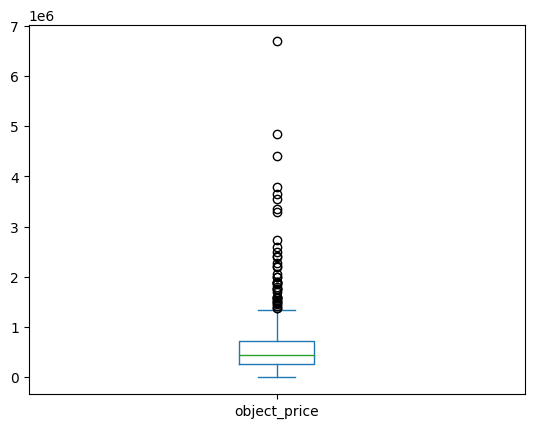

In [20]:
df_berlin_kaufen["object_price"].plot(kind="box")

In [ ]:
df_hamburg_kaufen = complete_session_df

In [21]:
df_berlin_kaufen.describe()

,enh_impression_position,broker_id,object_area,object_price,object_rooms
count,564.000000,5.640000e+02,564.000000,5.640000e+02,564.000000
mean,13.930851,1.577513e+06,78.566011,6.099884e+05,2.619681
std,7.758374,1.052472e+06,45.022103,6.175307e+05,1.326176
min,1.000000,1.400000e+03,0.000000,0.000000e+00,0.000000
25%,7.000000,3.641270e+05,49.000000,2.724750e+05,2.000000
50%,14.000000,1.724268e+06,70.000000,4.360000e+05,2.000000
75%,21.000000,2.389586e+06,97.037500,7.192000e+05,3.000000
max,27.000000,3.154356e+06,451.000000,6.690000e+06,11.000000


In [10]:
df_berlin_mieten 